<h1 align=center><font size = 5>New Construction and Potential for New Businesses in Neighborhoods in Palm Beach County </font></h1>

## Introduction

In this report, we take data from Palm Beach County Planning, Zoning and Building, 2019 Building Permit Reports, (found here http://discover.pbcgov.org/pzb/planning/Pages/Permit-Activity-Reports.aspx ) to find where the county is permitting new housing construction. Also, we will use the Foursquare API to explore neighborhoods in Palm Beach County.  We will do analysis to determine what venues maybe needed to service these new planned housing developments. We will use the **explore** function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. You will use the *k*-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in Palm Beach County and their emerging clusters.  

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in Palm Beach County</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Import libraries 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import json  #library to handle json files
import random # library for random number generation

#scraping pdf
!pip install tabula-py
!pip install tabulate
import tabula 
import tabulate

#excell files
import xlrd


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means for clustering
from sklearn.cluster import KMeans

#libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
#tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
import os
print (os.getcwd())

/resources/labs/DP0701EN


We created a new excell dataframe which cordinates the Cities in the Municipality columns with their cordinates found by this website www.lat-long.com or https://www.findlatitudeandlongitude.com/ or latlong.net

In [3]:
lat_lon = pd.read_excel(r'/resources/labs/DP0701EN/Palm Beach County Cities and Zips.xlsx')
lat_lon.head()
                        

,MUNICIPALITIES,Latitude,Longitude
0,Atlantis,26.590902,-80.100876
1,Belle Glade,26.684510,-80.667558
2,Boca Raton,26.358688,-80.083098
3,Boynton Beach,26.525349,-80.066431
4,Briny Breezes town,26.508405,-80.050875


For the pdf dataframe ... we used the tabula technology to extract the dataframe to a cvs file https://tabula.technology/

In [4]:
PAR = pd.read_csv(r'/resources/labs/DP0701EN/tabula-4thQuarterPermitActivityReport.csv', sep=',', header=None,  names = ["MUNICIPALITIES", "SINGLE FAMILY UNITS", "SFU VALUE", "MULTI FAMILY UNITS", "MFU VALUE", "TOTAL UNITS", "TOTAL UNITS VALUE"])
PAR.head()
                        

,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE
0,Atlantis,1,"$720,000",0,$0,1,"$720,000"
1,Belle Glade,2,"$300,000",0,$0,2,"$300,000"
2,Boca Raton,26,"$20,294,965",5,"$576,252",31,"$20,871,217"
3,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954"
4,Briny Breezes town,0,$0,0,$0,0,$0


In [5]:
#sorting values by total units and take the top 5 Municipalities of new construction to look at. 
Top5 =PAR.sort_values(by = 'TOTAL UNITS', ascending = False).head()
Top5


,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE
26,Palm Beach County Unincorporated Area,543,"$191,834,714",156,"$8,566,105",699,"$200,400,819"
37,West Palm Beach,17,"$4,036,764",558,"$56,036,486",575,"$60,073,250"
3,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954"
38,Westlake,76,"$17,596,144",0,$0,76,"$17,596,144"
27,Palm Beach Gardens,53,"$24,789,011",20,"$1,981,103",73,"$26,770,114"


merge dataframes

In [6]:
#merge dataframes
PBC_df= pd.merge( Top5,lat_lon, on='MUNICIPALITIES')
PBC_df

,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE,Latitude,Longitude
0,Palm Beach County Unincorporated Area,543,"$191,834,714",156,"$8,566,105",699,"$200,400,819",26.709723,-80.064163
1,West Palm Beach,17,"$4,036,764",558,"$56,036,486",575,"$60,073,250",26.715300,-80.053400
2,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431
3,Westlake,76,"$17,596,144",0,$0,76,"$17,596,144",26.747000,-80.307700
4,Palm Beach Gardens,53,"$24,789,011",20,"$1,981,103",73,"$26,770,114",26.839600,-80.101900


EXPLORE AND CLUSTER 

In [7]:
## MAP OF TOP 5 Municipalities of new construction

In [8]:
address = 'Palm Beach County'

geolocator = Nominatim(user_agent="PBC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Palm Beach County are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Palm Beach County are 26.6279798, -80.4494174.


In [9]:
map_PBC = folium.Map(location=[latitude,longitude],zoom_start=10)

for lat,lng,municipality in zip(PBC_df['Latitude'],PBC_df['Longitude'],PBC_df['MUNICIPALITIES']):
    label = '{}'.format(municipality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=2,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_PBC)
map_PBC

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

## Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'LAUAGY5VQH2DJ4VUXN4OXSNGEGCKT0TLXSDASO4FL1XB4SES' # your Foursquare ID
CLIENT_SECRET = 'D3CTWFSGB2D5XW0DQ02ZB2VGVOI2IZMI0ISACKDSVCL0MEV2' # your Foursquare Secret
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LAUAGY5VQH2DJ4VUXN4OXSNGEGCKT0TLXSDASO4FL1XB4SES
CLIENT_SECRET:D3CTWFSGB2D5XW0DQ02ZB2VGVOI2IZMI0ISACKDSVCL0MEV2


## Let's explore the neighborhood of Palm Beach County



get venues

In [11]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 100000 # define radius

In [12]:
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=LAUAGY5VQH2DJ4VUXN4OXSNGEGCKT0TLXSDASO4FL1XB4SES&client_secret=D3CTWFSGB2D5XW0DQ02ZB2VGVOI2IZMI0ISACKDSVCL0MEV2&v=20180605&ll=26.6279798,-80.4494174&radius=100000&limit=100'

send Get request to examn the results

In [13]:
results = requests.get(url).json()

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Clean Data in JSon File put it in panda dataframe 

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Trader Joe's,Grocery Store,26.636809,-80.205553
1,Whole Foods Market,Grocery Store,26.641351,-80.205912
2,Chick-fil-A,Fast Food Restaurant,26.676292,-80.201740
3,La Perrada del Gordo,Spanish Restaurant,26.638005,-80.112046
4,Morikami Museum And Japanese Gardens,Garden,26.428870,-80.156608


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['MUNICIPALITIES', 
                  'Municipality Latitude', 
                  'Municipality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
PBC_venues = getNearbyVenues(names=PBC_df['MUNICIPALITIES'],
                                   latitudes=PBC_df['Latitude'],
                                   longitudes=PBC_df['Longitude']
                                  )

Palm Beach County Unincorporated Area
West Palm Beach
Boynton Beach
Westlake
Palm Beach Gardens


Get new dataframe with venues

In [18]:
PBC_venues.head()

,MUNICIPALITIES,Municipality Latitude,Municipality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palm Beach County Unincorporated Area,26.709723,-80.064163,Victoria's Secret PINK,26.706917,-80.060949,Lingerie Store
1,Palm Beach County Unincorporated Area,26.709723,-80.064163,West Palm Beach Marriott,26.707069,-80.063349,Hotel
2,Palm Beach County Unincorporated Area,26.709723,-80.064163,Okeechobee & Parker RR Xing,26.706047,-80.062406,Rest Area
3,Palm Beach County Unincorporated Area,26.709723,-80.064163,Bistro Ten Zero One,26.707419,-80.063645,Diner
4,Palm Beach County Unincorporated Area,26.709723,-80.064163,Shoes For Crews LLC,26.712893,-80.064453,Shoe Store


Group by Municipality

In [19]:
PBC_venues.groupby('MUNICIPALITIES').count().head()

,Municipality Latitude,Municipality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
MUNICIPALITIES,,,,,,
Boynton Beach,6,6,6,6,6,6
Palm Beach County Unincorporated Area,8,8,8,8,8,8
Palm Beach Gardens,20,20,20,20,20,20
West Palm Beach,71,71,71,71,71,71
Westlake,2,2,2,2,2,2


In [20]:
print('There are {} uniques categories.'.format(len(PBC_venues['Venue Category'].unique())))

There are 65 uniques categories.


Merge dataframes to get the new family units built by each Municipalities


In [21]:
NewHousingPBC = pd.merge(PAR, PBC_venues, on='MUNICIPALITIES')
NewHousingPBC.head()

,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE,Municipality Latitude,Municipality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Schoolhouse Children's Museum & Learning Center,26.527577,-80.062953,Museum
1,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Sailfish Cafe,26.526408,-80.063509,Café
2,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,South Beach Baby,26.523549,-80.063925,Beach
3,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Concrete Solutions Fl,26.524458,-80.063360,Construction & Landscaping
4,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Mulch Park,26.526872,-80.062625,Playground


# Analyze  Each Neighborhood

In [22]:
# one hot encoding
PBC_onehot = pd.get_dummies(PBC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
PBC_onehot['MUNICIPALITIES'] = PBC_venues['MUNICIPALITIES'] 

# move neighborhood column to the first column
fixed_columns = [PBC_onehot.columns[-1]] + list(PBC_onehot.columns[:-1])
PBC_onehot = PBC_onehot[fixed_columns]

PBC_onehot.head()

,MUNICIPALITIES,American Restaurant,Asian Restaurant,Bank,Bar,Baseball Field,Beach,Bistro,Breakfast Spot,Brewery,...,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Steakhouse,Sushi Restaurant,Theater,Train Station,Wine Bar
0,Palm Beach County Unincorporated Area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Palm Beach County Unincorporated Area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Palm Beach County Unincorporated Area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Palm Beach County Unincorporated Area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Palm Beach County Unincorporated Area,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [23]:
PBC_grouped = PBC_onehot.groupby('MUNICIPALITIES').mean().reset_index()
PBC_grouped.head()

,MUNICIPALITIES,American Restaurant,Asian Restaurant,Bank,Bar,Baseball Field,Beach,Bistro,Breakfast Spot,Brewery,...,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Steakhouse,Sushi Restaurant,Theater,Train Station,Wine Bar
0,Boynton Beach,0.166667,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1,Palm Beach County Unincorporated Area,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.125,0.00,0.00,0.000000,0.000000,0.000000,0.000000
2,Palm Beach Gardens,0.050000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.000000,...,0.000000,0.000000,0.05,0.050,0.05,0.05,0.050000,0.000000,0.000000,0.000000
3,West Palm Beach,0.014085,0.042254,0.042254,0.056338,0.0,0.000000,0.014085,0.014085,0.014085,...,0.028169,0.014085,0.00,0.000,0.00,0.00,0.014085,0.014085,0.014085,0.014085
4,Westlake,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000


#### Let's print each neighborhood along with the top 5 most common venues

In [24]:
num_top_venues = 5

for hood in PBC_grouped['MUNICIPALITIES']:
    print("----"+hood+"----")
    temp = PBC_grouped[PBC_grouped['MUNICIPALITIES'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Boynton Beach----
                 venue  freq
0  American Restaurant  0.17
1                Beach  0.17
2               Museum  0.17
3           Playground  0.17
4                 Café  0.17


----Palm Beach County Unincorporated Area----
            venue  freq
0     Bus Station  0.25
1           Diner  0.12
2           Hotel  0.12
3  Lingerie Store  0.12
4       Rest Area  0.12


----Palm Beach Gardens----
                 venue  freq
0                Hotel  0.10
1  American Restaurant  0.05
2           Donut Shop  0.05
3     Sushi Restaurant  0.05
4           Steakhouse  0.05


----West Palm Beach----
               venue  freq
0                Bar  0.06
1        Pizza Place  0.06
2        Coffee Shop  0.04
3  French Restaurant  0.04
4     Farmers Market  0.04


----Westlake----
                venue  freq
0        Intersection   0.5
1      Baseball Field   0.5
2  Mexican Restaurant   0.0
3            Pharmacy   0.0
4                Park   0.0




In [25]:
#function to sort in decending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['MUNICIPALITIES']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['MUNICIPALITIES'] = PBC_grouped['MUNICIPALITIES']

for ind in np.arange(PBC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(PBC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,MUNICIPALITIES,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boynton Beach,American Restaurant,Beach,Playground,Museum,Café,Construction & Landscaping,Greek Restaurant,Gastropub,Gas Station,Concert Hall
1,Palm Beach County Unincorporated Area,Bus Station,Hotel,Shoe Store,Diner,Business Service,Rest Area,Lingerie Store,Gastropub,Gas Station,Concert Hall
2,Palm Beach Gardens,Hotel,Hotel Pool,Pharmacy,Breakfast Spot,Chocolate Shop,Coffee Shop,Donut Shop,Gas Station,Greek Restaurant,Grocery Store
3,West Palm Beach,Bar,Pizza Place,Farmers Market,Asian Restaurant,Bank,French Restaurant,Park,Middle Eastern Restaurant,Gastropub,Coffee Shop
4,Westlake,Intersection,Baseball Field,Wine Bar,Gas Station,Diner,Donut Shop,Farmers Market,Fountain,French Restaurant,Greek Restaurant


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [27]:
# set number of clusters
kclusters = 5

PBC_grouped_clustering = PBC_grouped.drop('MUNICIPALITIES', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(PBC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 4, 0], dtype=int32)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

PBC_merged = PBC_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
PBC_merged = PBC_merged.join(neighborhoods_venues_sorted.set_index('MUNICIPALITIES'), on='MUNICIPALITIES')

PBC_merged.head() # check the last columns!

,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palm Beach County Unincorporated Area,543,"$191,834,714",156,"$8,566,105",699,"$200,400,819",26.709723,-80.064163,3,Bus Station,Hotel,Shoe Store,Diner,Business Service,Rest Area,Lingerie Store,Gastropub,Gas Station,Concert Hall
1,West Palm Beach,17,"$4,036,764",558,"$56,036,486",575,"$60,073,250",26.715300,-80.053400,4,Bar,Pizza Place,Farmers Market,Asian Restaurant,Bank,French Restaurant,Park,Middle Eastern Restaurant,Gastropub,Coffee Shop
2,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,2,American Restaurant,Beach,Playground,Museum,Café,Construction & Landscaping,Greek Restaurant,Gastropub,Gas Station,Concert Hall
3,Westlake,76,"$17,596,144",0,$0,76,"$17,596,144",26.747000,-80.307700,0,Intersection,Baseball Field,Wine Bar,Gas Station,Diner,Donut Shop,Farmers Market,Fountain,French Restaurant,Greek Restaurant
4,Palm Beach Gardens,53,"$24,789,011",20,"$1,981,103",73,"$26,770,114",26.839600,-80.101900,1,Hotel,Hotel Pool,Pharmacy,Breakfast Spot,Chocolate Shop,Coffee Shop,Donut Shop,Gas Station,Greek Restaurant,Grocery Store


Finally, let's visualize the resulting clusters

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(PBC_merged['Latitude'], PBC_merged['Longitude'], PBC_merged['MUNICIPALITIES'], PBC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Let's print each neighborhood along with the 20 least common venues

In [30]:
num_least_venues = 5

for hood in PBC_grouped['MUNICIPALITIES']:
    print("----"+hood+"----")
    temp = PBC_grouped[PBC_grouped['MUNICIPALITIES'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=True).reset_index(drop=True).head(num_least_venues))
    print('\n')

----Boynton Beach----
                venue  freq
0          Hotel Pool   0.0
1      Ice Cream Shop   0.0
2        Intersection   0.0
3           Irish Pub   0.0
4  Italian Restaurant   0.0


----Palm Beach County Unincorporated Area----
                 venue  freq
0  American Restaurant   0.0
1       Ice Cream Shop   0.0
2         Intersection   0.0
3            Irish Pub   0.0
4   Italian Restaurant   0.0


----Palm Beach Gardens----
                  venue  freq
0              Wine Bar   0.0
1                   Gym   0.0
2  Gym / Fitness Center   0.0
3        Sandwich Place   0.0
4            Hobby Shop   0.0


----West Palm Beach----
               venue  freq
0         Hotel Pool   0.0
1          Irish Pub   0.0
2  Health Food Store   0.0
3     Lingerie Store   0.0
4   Greek Restaurant   0.0


----Westlake----
                 venue  freq
0  American Restaurant   0.0
1            Irish Pub   0.0
2   Italian Restaurant   0.0
3            Juice Bar   0.0
4       Lingerie Store   0.

In [31]:
#function to sort in decending order
def return_least_common_venues(row, num_least_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=True)
    
    return row_categories_sorted.index.values[0:num_least_venues]

In [32]:
num_least_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['MUNICIPALITIES']
for ind in np.arange(num_least_venues):
    try:
        columns.append('{}{} Least Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Least Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['MUNICIPALITIES'] = PBC_grouped['MUNICIPALITIES']

for ind in np.arange(PBC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_least_common_venues(PBC_grouped.iloc[ind, :], num_least_venues)

neighborhoods_venues_sorted.head()

,MUNICIPALITIES,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,...,11th Least Common Venue,12th Least Common Venue,13th Least Common Venue,14th Least Common Venue,15th Least Common Venue,16th Least Common Venue,17th Least Common Venue,18th Least Common Venue,19th Least Common Venue,20th Least Common Venue
0,Boynton Beach,Hotel Pool,Ice Cream Shop,Intersection,Irish Pub,Italian Restaurant,Juice Bar,Lingerie Store,Lounge,Mediterranean Restaurant,...,Middle Eastern Restaurant,Music Venue,Nightclub,Park,Train Station,Pharmacy,Pub,Rest Area,Restaurant,Road
1,Palm Beach County Unincorporated Area,American Restaurant,Ice Cream Shop,Intersection,Irish Pub,Italian Restaurant,Juice Bar,Lounge,Mediterranean Restaurant,Mexican Restaurant,...,Museum,Music Venue,Nightclub,Park,Pharmacy,Pizza Place,Playground,Pub,Restaurant,Road
2,Palm Beach Gardens,Wine Bar,Gym,Gym / Fitness Center,Sandwich Place,Hobby Shop,Salad Place,Train Station,Ice Cream Shop,Intersection,...,Italian Restaurant,Sculpture Garden,Juice Bar,Lounge,Mediterranean Restaurant,Restaurant,Middle Eastern Restaurant,Museum,Music Venue,Nightclub
3,West Palm Beach,Hotel Pool,Irish Pub,Health Food Store,Lingerie Store,Greek Restaurant,Museum,Gas Station,Playground,Rest Area,...,Construction & Landscaping,Hotel,Chocolate Shop,Intersection,Café,Steakhouse,Baseball Field,Beach,Shoe Store,Shopping Mall
4,Westlake,American Restaurant,Irish Pub,Italian Restaurant,Juice Bar,Lingerie Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,...,Music Venue,Nightclub,Park,Pharmacy,Ice Cream Shop,Pizza Place,Pub,Rest Area,Restaurant,Road


Let's decide which venues are nessisary and look at what Municipalities of new development they are lacking.   In order to suggest these services to move into the neighborhood.

# lets look at venue categories to get a better idea


In [33]:
VenueC = PBC_venues['Venue Category'].unique()
VenueC

array(['Lingerie Store', 'Hotel', 'Rest Area', 'Diner', 'Shoe Store',
       'Bus Station', 'Business Service', 'Salad Place', 'Hobby Shop',
       'Mexican Restaurant', 'Middle Eastern Restaurant', 'Bar',
       'Sushi Restaurant', 'Coffee Shop', 'Pub', 'Italian Restaurant',
       'Gastropub', 'Asian Restaurant', 'Farmers Market',
       'French Restaurant', 'Gym / Fitness Center', 'Nightclub',
       'Burrito Place', 'Wine Bar', 'American Restaurant', 'Lounge',
       'Donut Shop', 'Theater', 'Mediterranean Restaurant', 'Pizza Place',
       'Park', 'Restaurant', 'Train Station', 'Bistro', 'Brewery',
       'Juice Bar', 'Fountain', 'Sandwich Place', 'Candy Store', 'Road',
       'Ice Cream Shop', 'Bank', 'Music Venue', 'Sculpture Garden',
       'Pharmacy', 'Concert Hall', 'Breakfast Spot', 'Grocery Store',
       'Gym', 'Museum', 'Café', 'Beach', 'Construction & Landscaping',
       'Playground', 'Intersection', 'Baseball Field', 'Greek Restaurant',
       'Irish Pub', 'Health Food

### What we see is there is a restraurant column and then many different kinds of restaurants under there type in their own column Also there is a Bar and a Pub and Wine Bar and Lounge and Brewery which seems the same.   This means the Venue Category is confusing


In [34]:
new_column= np.array(['Clothing', 'Hospitality', 'Park', 'Restaurant', 'Clothing', 'Bus', 'Business Service', 'Restaurant','Hobby Shop', 'Restaurant','Restaurant','Bar','Restaurant','Cafe', 'Bar', 'Restaurant','Bar','Restaurant','Grocery','Restaurant','Gym','Nightclub','Restaurant','Bar','Restaurant','Nightclub','Cafe','Theater','Restaurant','Restaurant','Park', 'Restaurant','Train','Restaurant','Bar','Bar','Park','Restaurant','Grocery','Road','Restaurant','Bank','Theater','Park','Pharmacy','Theater','Restaurant','Grocery','Gym','Museum','Cafe','Park','Construction','Park','Intersection','Park','Restaurant','Bar','Grocery','Restaurant','Gas Station','Business Service','Clothing','Hospitality','Grocery'])
dataset = pd.DataFrame({'Venue Category': VenueC, 'Category': new_column}, columns=['Venue Category', 'Category'])
dataset

,Venue Category,Category
0,Lingerie Store,Clothing
1,Hotel,Hospitality
2,Rest Area,Park
3,Diner,Restaurant
4,Shoe Store,Clothing
...,...,...
60,Gas Station,Gas Station
61,Shipping Store,Business Service
62,Shopping Mall,Clothing
63,Hotel Pool,Hospitality


This new dataframe has narrowed down the search because there were multiple of the same services in different categories

In [35]:
CategoryPBC = pd.merge(NewHousingPBC, dataset, on='Venue Category')
CategoryPBC

,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE,Municipality Latitude,Municipality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Category
0,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Schoolhouse Children's Museum & Learning Center,26.527577,-80.062953,Museum,Museum
1,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Sailfish Cafe,26.526408,-80.063509,Café,Cafe
2,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,South Beach Baby,26.523549,-80.063925,Beach,Park
3,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Concrete Solutions Fl,26.524458,-80.063360,Construction & Landscaping,Construction
4,Boynton Beach,3,"$712,370",116,"$6,217,584",119,"$6,929,954",26.525349,-80.066431,Mulch Park,26.526872,-80.062625,Playground,Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,West Palm Beach,17,"$4,036,764",558,"$56,036,486",575,"$60,073,250",26.715300,-80.053400,Sandi The Sand Christmas Tree,26.713049,-80.049560,Sculpture Garden,Park
103,West Palm Beach,17,"$4,036,764",558,"$56,036,486",575,"$60,073,250",26.715300,-80.053400,Ford Stage @ Sunfest,26.713149,-80.049118,Concert Hall,Theater
104,West Palm Beach,17,"$4,036,764",558,"$56,036,486",575,"$60,073,250",26.715300,-80.053400,Gym @ 610 Clematis,26.712944,-80.057572,Gym,Gym
105,Westlake,76,"$17,596,144",0,$0,76,"$17,596,144",26.747000,-80.307700,Seminal Pratt & Sycamore,26.746012,-80.307793,Intersection,Intersection


In [36]:
CategoryPBC.groupby('Category').count().head()

,MUNICIPALITIES,SINGLE FAMILY UNITS,SFU VALUE,MULTI FAMILY UNITS,MFU VALUE,TOTAL UNITS,TOTAL UNITS VALUE,Municipality Latitude,Municipality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Category,,,,,,,,,,,,,
Bank,3,3,3,3,3,3,3,3,3,3,3,3,3
Bar,13,13,13,13,13,13,13,13,13,13,13,13,13
Bus,2,2,2,2,2,2,2,2,2,2,2,2,2
Business Service,2,2,2,2,2,2,2,2,2,2,2,2,2
Cafe,8,8,8,8,8,8,8,8,8,8,8,8,8


In [37]:
small_df=CategoryPBC.loc[:,['MUNICIPALITIES','Category','Venue Category','Venue','TOTAL UNITS']]
small_df.head()


,MUNICIPALITIES,Category,Venue Category,Venue,TOTAL UNITS
0,Boynton Beach,Museum,Museum,Schoolhouse Children's Museum & Learning Center,119
1,Boynton Beach,Cafe,Café,Sailfish Cafe,119
2,Boynton Beach,Park,Beach,South Beach Baby,119
3,Boynton Beach,Construction,Construction & Landscaping,Concrete Solutions Fl,119
4,Boynton Beach,Park,Playground,Mulch Park,119


# DATA FRAMES FOR EACH CITY WITH TYPES OF CATEGORY AND COUNTS OF EACH CATEGORY AND TOTAL NEW UNITS BEING BUILT IN CITY

In [38]:
small_df['MUNICIPALITIES'].unique()

array(['Boynton Beach', 'Palm Beach Gardens', 'West Palm Beach',
       'Palm Beach County Unincorporated Area', 'Westlake'], dtype=object)

## BOYNTON BEACH

In [39]:
Boynton_Beach=small_df[small_df['MUNICIPALITIES']=='Boynton Beach']
Boynton_Beach_c=Boynton_Beach['Category'].value_counts().to_frame(name='Count')
Boynton_Beach

,MUNICIPALITIES,Category,Venue Category,Venue,TOTAL UNITS
0,Boynton Beach,Museum,Museum,Schoolhouse Children's Museum & Learning Center,119
1,Boynton Beach,Cafe,Café,Sailfish Cafe,119
2,Boynton Beach,Park,Beach,South Beach Baby,119
3,Boynton Beach,Construction,Construction & Landscaping,Concrete Solutions Fl,119
4,Boynton Beach,Park,Playground,Mulch Park,119
5,Boynton Beach,Restaurant,American Restaurant,John G''s,119


In [40]:
Boynton_Beach_c

,Count
Park,2
Construction,1
Restaurant,1
Cafe,1
Museum,1


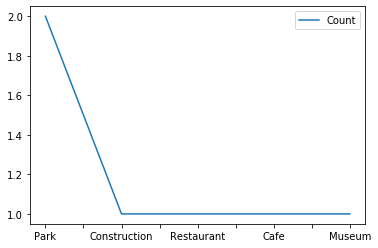

In [41]:
Boynton_Beach_c.plot()

## PALM BEACH GARDENS

In [42]:
Palm_Beach_Gardens=small_df[small_df['MUNICIPALITIES']=='Palm Beach Gardens']
Palm_Beach_Gardens_c=Palm_Beach_Gardens['Category'].value_counts().to_frame(name='Count')
Palm_Beach_Gardens

,MUNICIPALITIES,Category,Venue Category,Venue,TOTAL UNITS
6,Palm Beach Gardens,Restaurant,American Restaurant,Cafe Chardonnay,73
10,Palm Beach Gardens,Hospitality,Hotel,DoubleTree by Hilton,73
11,Palm Beach Gardens,Hospitality,Hotel,Palm Beach Gardens Marriott,73
15,Palm Beach Gardens,Clothing,Shoe Store,The Shoe Spa,73
19,Palm Beach Gardens,Restaurant,Greek Restaurant,Mr. Gyros - Mediterranean Grill,73
20,Palm Beach Gardens,Bar,Irish Pub,Paddy Mac's Irish Pub & Restaurant,73
21,Palm Beach Gardens,Grocery,Grocery Store,Publix,73
23,Palm Beach Gardens,Restaurant,Mexican Restaurant,Tacueria Taco Chula,73
26,Palm Beach Gardens,Pharmacy,Pharmacy,CVS pharmacy,73
28,Palm Beach Gardens,Grocery,Health Food Store,Mother Nature's Pantry,73


,Count
Restaurant,6
Hospitality,3
Grocery,3
Clothing,2
Cafe,2
Pharmacy,1
Business Service,1
Gas Station,1
Bar,1


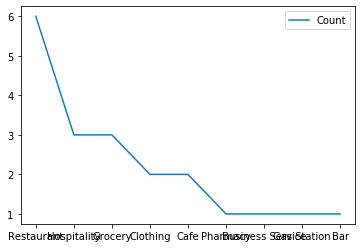

In [43]:
Palm_Beach_Gardens_c.plot()
Palm_Beach_Gardens_c

## WEST PALM BEACH

In [44]:
West_Palm_Beach=small_df[small_df['MUNICIPALITIES']=='West Palm Beach']
West_Palm_Beach_c=West_Palm_Beach['Category'].value_counts().to_frame(name='Count')
West_Palm_Beach

,MUNICIPALITIES,Category,Venue Category,Venue,TOTAL UNITS
7,West Palm Beach,Restaurant,American Restaurant,Duffy's Sports Grill,575
22,West Palm Beach,Grocery,Grocery Store,Green Olive Market Place,575
24,West Palm Beach,Restaurant,Mexican Restaurant,Rocco's Tacos and Tequila Bar,575
25,West Palm Beach,Restaurant,Mexican Restaurant,Banko Cantina,575
27,West Palm Beach,Pharmacy,Pharmacy,CVS Pharmacy,575
...,...,...,...,...,...
100,West Palm Beach,Theater,Music Venue,CLUB SUNFEST,575
101,West Palm Beach,Theater,Music Venue,Respectable Street Cafe,575
102,West Palm Beach,Park,Sculpture Garden,Sandi The Sand Christmas Tree,575
103,West Palm Beach,Theater,Concert Hall,Ford Stage @ Sunfest,575


In [45]:
West_Palm_Beach_c

,Count
Restaurant,29
Bar,12
Cafe,5
Park,5
Grocery,5
Theater,4
Bank,3
Nightclub,2
Gym,2
Hobby Shop,1


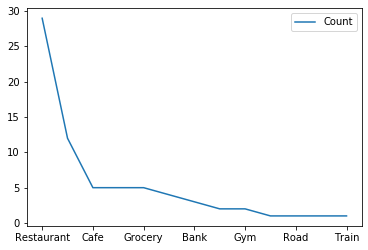

In [46]:
West_Palm_Beach_c.plot()


## PALM BEACH COUNTY UNINCORPORATED AREA

In [47]:
PBC_Unincorporated=small_df[small_df['MUNICIPALITIES']=='Palm Beach County Unincorporated Area']
PBC_Unincorporated_c=PBC_Unincorporated['Category'].value_counts().to_frame(name='Count')
PBC_Unincorporated

,MUNICIPALITIES,Category,Venue Category,Venue,TOTAL UNITS
8,Palm Beach County Unincorporated Area,Clothing,Lingerie Store,Victoria's Secret PINK,699
9,Palm Beach County Unincorporated Area,Hospitality,Hotel,West Palm Beach Marriott,699
12,Palm Beach County Unincorporated Area,Park,Rest Area,Okeechobee & Parker RR Xing,699
13,Palm Beach County Unincorporated Area,Restaurant,Diner,Bistro Ten Zero One,699
14,Palm Beach County Unincorporated Area,Clothing,Shoe Store,Shoes For Crews LLC,699
16,Palm Beach County Unincorporated Area,Bus,Bus Station,Greyhound Bus Lines,699
17,Palm Beach County Unincorporated Area,Bus,Bus Station,West Palm Beach Intermodal Transport Center,699
18,Palm Beach County Unincorporated Area,Business Service,Business Service,Robert Half,699


In [48]:
PBC_Unincorporated_c

,Count
Clothing,2
Bus,2
Park,1
Business Service,1
Restaurant,1
Hospitality,1


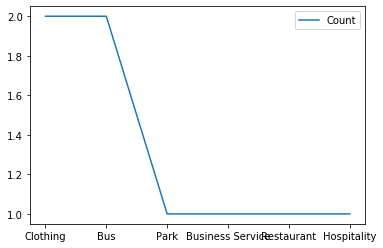

In [49]:
PBC_Unincorporated_c.plot()

## WESTLAKE

In [50]:
Westlake=small_df[small_df['MUNICIPALITIES']=='Westlake']
Westlake=Westlake.drop(columns=['MUNICIPALITIES'])
Westlake_c=Westlake['Category'].value_counts().to_frame(name='Count')
Westlake_c


,Count
Intersection,1
Park,1


# CONCLUSION

After observing the data given regarding the venues surrounding the new housing developments in Palm Beach County where the 5 most areas are being developed in the 4th quarter of 2019.  It seems that there is a need for a lot of commercial development needed.  Yet since I live in Palm Beach County, I am sure that the foursquare data is incorrect and there are much more venues then what is listed.  Therefore I would not make recommendations using that dataset. 

by Heidi Peterson